In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [2]:
df = pd.read_csv('telescope_data.csv')
df.head(1)

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head(1)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g


In [8]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df.tail()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,1


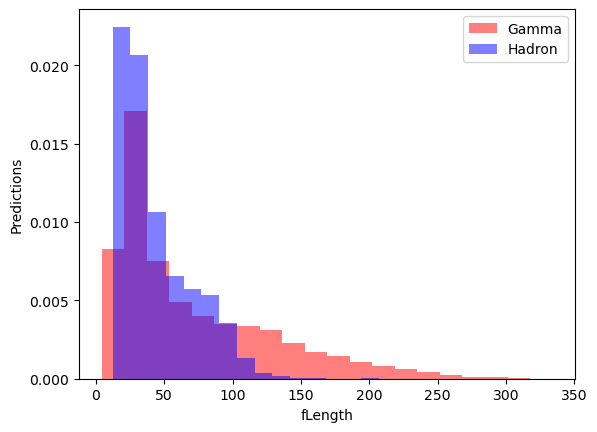

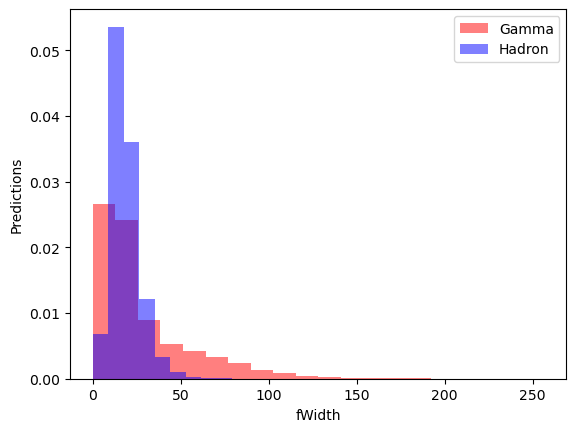

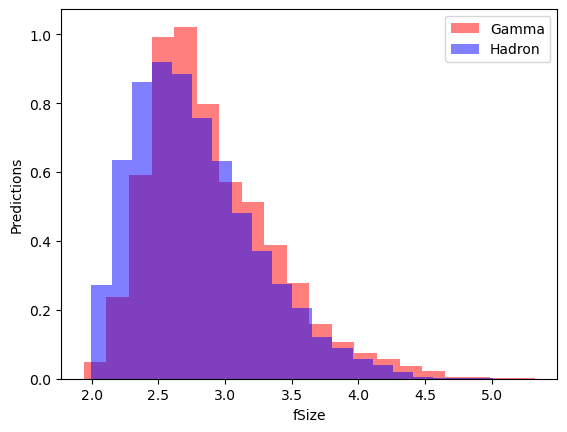

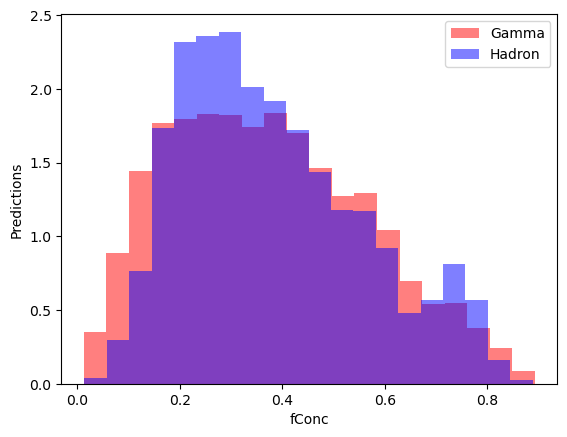

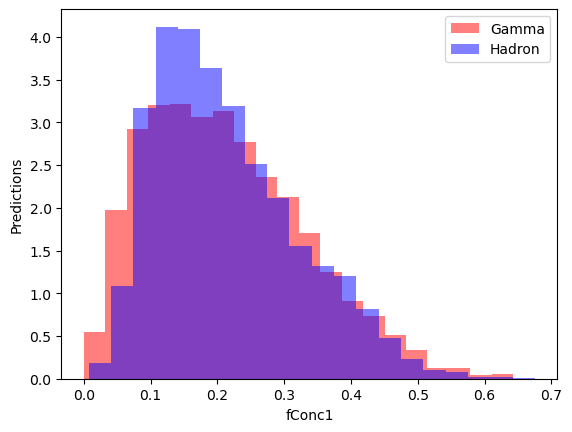

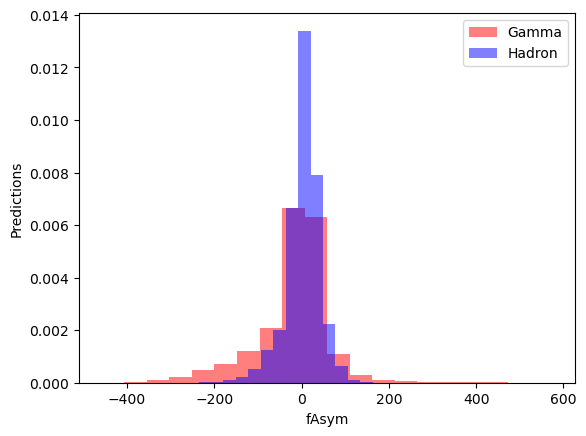

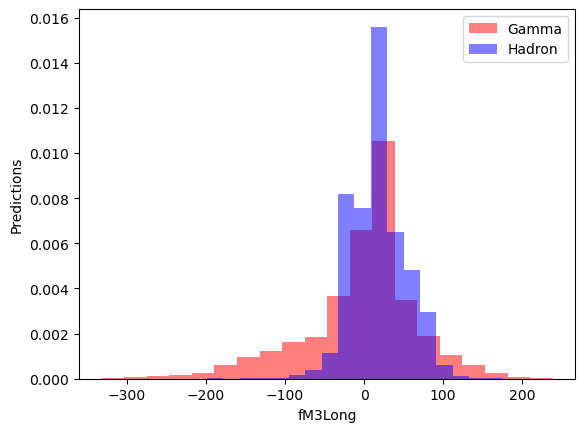

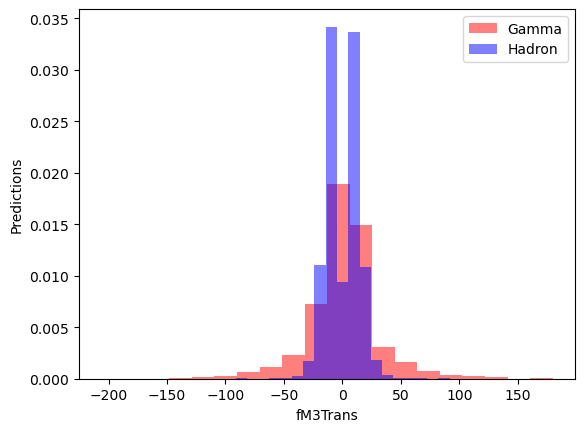

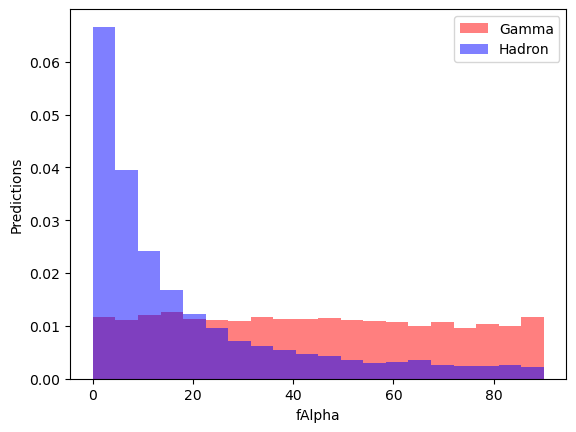

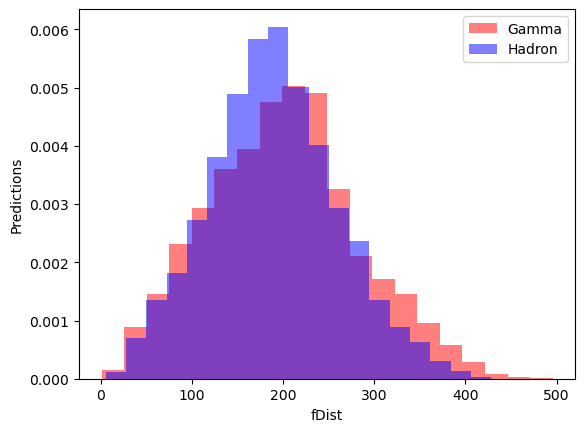

In [12]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['class']==1][label], color='red', bins=20, density=True, alpha=0.5, label='Gamma')
    plt.hist(df[df['class']==0][label], color='blue', bins=20, density=True, alpha=0.5, label='Hadron')    
    plt.xlabel(label)
    plt.ylabel('Predictions')
    plt.legend()
    plt.show();

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [20]:
data = np.hstack((X, np.reshape(y, (-1, 1))))
df = pd.DataFrame(data, columns=df.columns)

In [21]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,-0.577226,-0.336804,-0.381130,0.062759,-0.148923,0.541042,0.224818,-0.405842,0.476816,-1.497866,0.0
1,-0.510969,-0.570027,-0.648595,0.820383,1.471776,0.516919,0.260364,-0.490094,-0.815418,0.153125,0.0
2,2.568278,6.205858,2.615783,-1.875883,-1.773241,2.044992,-1.478536,-2.183030,1.889224,0.842635,0.0
3,-0.694768,-0.687259,-1.029478,1.282069,1.606608,0.532771,-0.333515,-0.355359,-0.658804,-1.031463,0.0
4,0.516622,0.476384,0.711157,-0.347506,-0.284660,-0.020200,0.353086,1.036620,-0.881039,2.176427,0.0


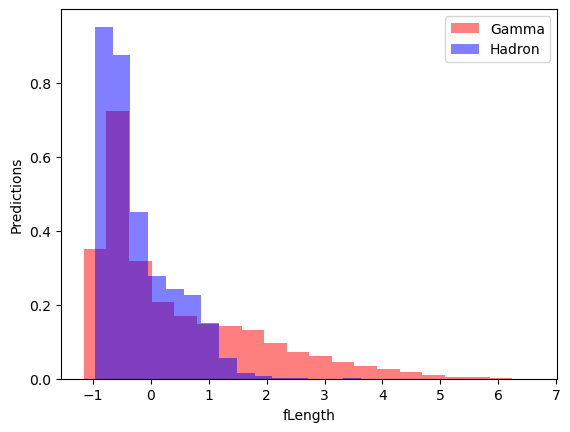

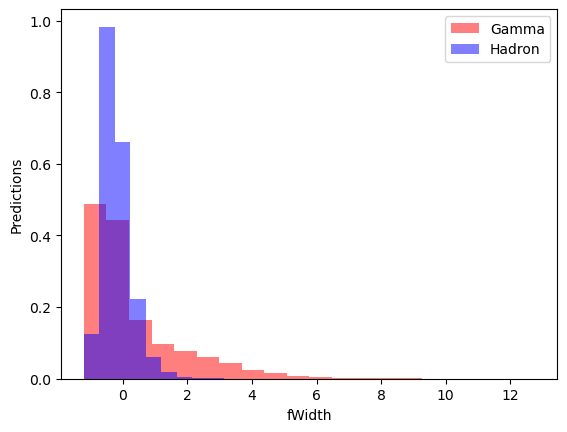

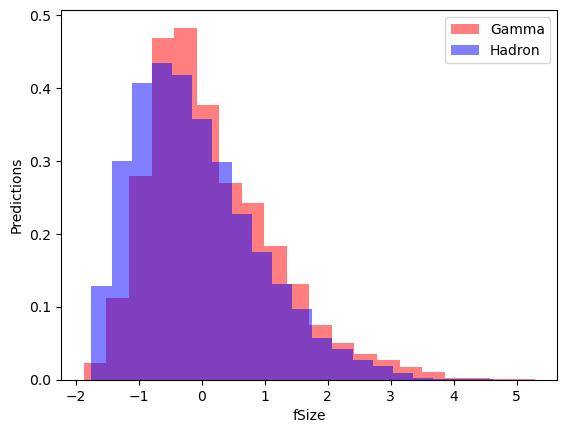

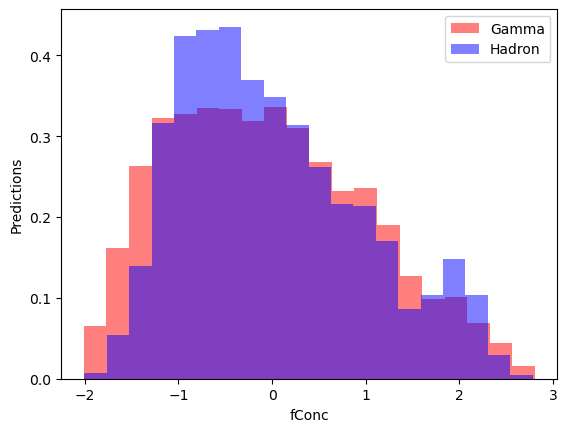

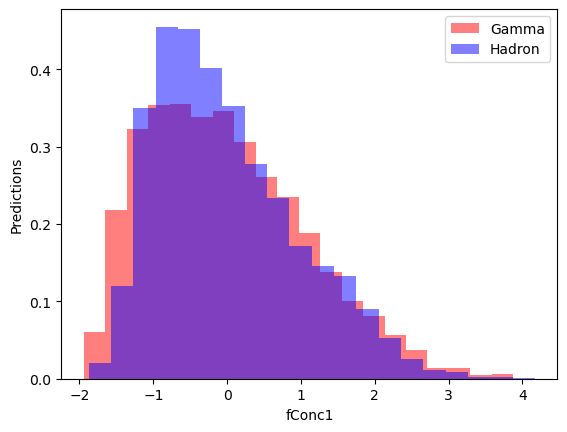

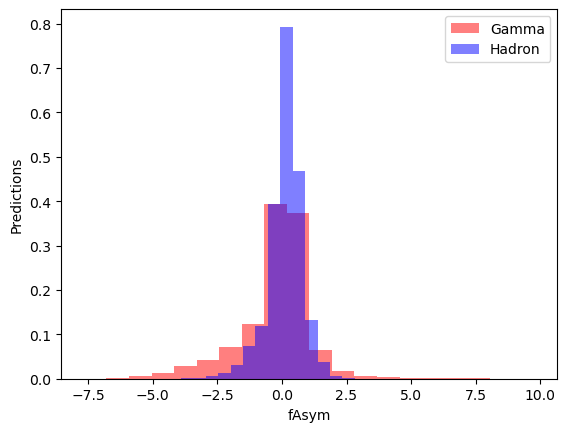

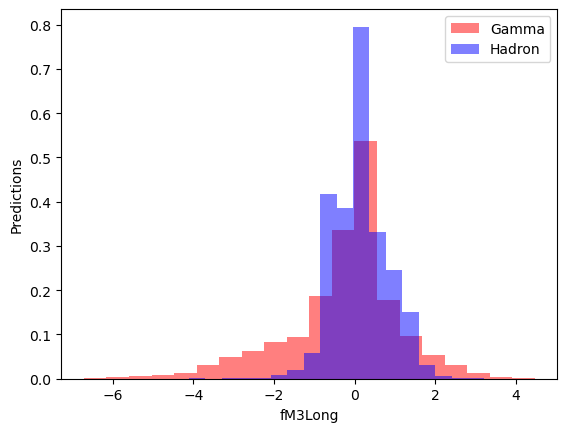

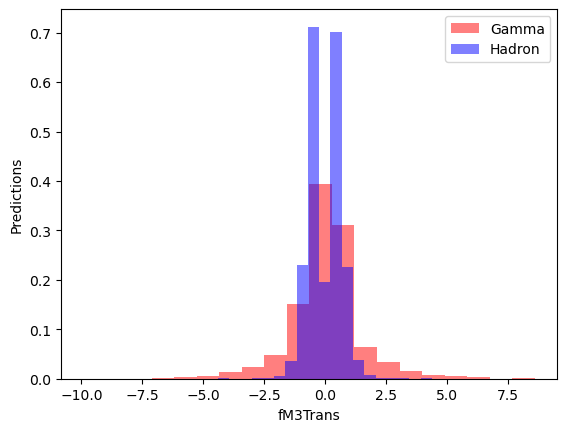

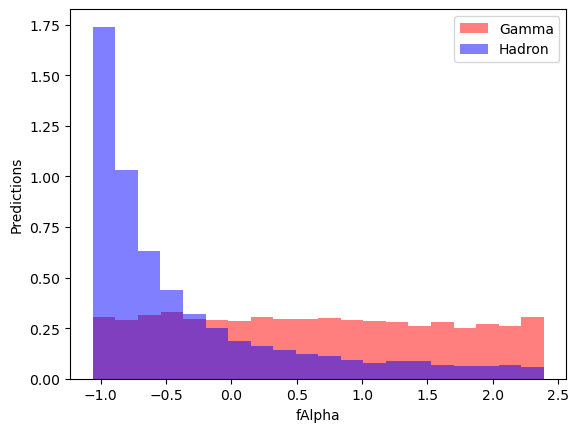

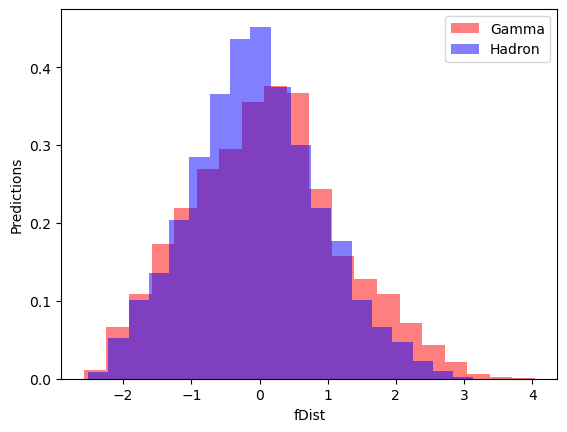

In [22]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['class']==1][label], color='red', bins=20, density=True, alpha=0.5, label='Gamma')
    plt.hist(df[df['class']==0][label], color='blue', bins=20, density=True, alpha=0.5, label='Hadron')    
    plt.xlabel(label)
    plt.ylabel('Predictions')
    plt.legend()
    plt.show();

In [28]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_train, y_train, test_size = 0.5, random_state=0)

In [29]:
X_train.shape, X_valid.shape, X_test.shape

((11412, 10), (5706, 10), (5706, 10))

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [34]:
model.evaluate(X_train, y_train)

357/357 [==============================] - 0s 429us/step - loss: 0.7209 - accuracy: 0.5389


[0.7208970189094543, 0.5389063954353333]

In [35]:
model.evaluate(X_valid, y_valid)

179/179 [==============================] - 0s 443us/step - loss: 0.7183 - accuracy: 0.5485


[0.7183482050895691, 0.5485454201698303]

In [38]:
history = model.fit(X_train, y_train, batch_size=16, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
714/714 [==============================] - 1s 817us/step - loss: 0.2346 - accuracy: 0.9026 - val_loss: 0.2340 - val_accuracy: 0.9055
Epoch 2/150
714/714 [==============================] - 1s 790us/step - loss: 0.2351 - accuracy: 0.9026 - val_loss: 0.2350 - val_accuracy: 0.9034
Epoch 3/150
714/714 [==============================] - 1s 781us/step - loss: 0.2347 - accuracy: 0.9008 - val_loss: 0.2339 - val_accuracy: 0.9034
Epoch 4/150
714/714 [==============================] - 1s 779us/step - loss: 0.2353 - accuracy: 0.9009 - val_loss: 0.2305 - val_accuracy: 0.9055
Epoch 5/150
714/714 [==============================] - 1s 779us/step - loss: 0.2319 - accuracy: 0.9040 - val_loss: 0.2316 - val_accuracy: 0.9041
Epoch 6/150
714/714 [==============================] - 1s 781us/step - loss: 0.2346 - accuracy: 0.9020 - val_loss: 0.2370 - val_accuracy: 0.9008
Epoch 7/150
714/714 [==============================] - 1s 783us/step - loss: 0.2314 - accuracy: 0.9040 - val_loss: 0.2317 - val_ac

714/714 [==============================] - 1s 782us/step - loss: 0.2222 - accuracy: 0.9081 - val_loss: 0.2269 - val_accuracy: 0.9050
Epoch 58/150
714/714 [==============================] - 1s 776us/step - loss: 0.2212 - accuracy: 0.9118 - val_loss: 0.2204 - val_accuracy: 0.9092
Epoch 59/150
714/714 [==============================] - 1s 778us/step - loss: 0.2222 - accuracy: 0.9096 - val_loss: 0.2283 - val_accuracy: 0.9054
Epoch 60/150
714/714 [==============================] - 1s 778us/step - loss: 0.2223 - accuracy: 0.9087 - val_loss: 0.2187 - val_accuracy: 0.9117
Epoch 61/150
714/714 [==============================] - 1s 780us/step - loss: 0.2217 - accuracy: 0.9095 - val_loss: 0.2207 - val_accuracy: 0.9148
Epoch 62/150
714/714 [==============================] - 1s 782us/step - loss: 0.2223 - accuracy: 0.9088 - val_loss: 0.2242 - val_accuracy: 0.9055
Epoch 63/150
714/714 [==============================] - 1s 777us/step - loss: 0.2225 - accuracy: 0.9091 - val_loss: 0.2208 - val_accuracy

714/714 [==============================] - 1s 780us/step - loss: 0.2120 - accuracy: 0.9135 - val_loss: 0.2116 - val_accuracy: 0.9138
Epoch 114/150
714/714 [==============================] - 1s 779us/step - loss: 0.2131 - accuracy: 0.9139 - val_loss: 0.2089 - val_accuracy: 0.9157
Epoch 115/150
714/714 [==============================] - 1s 782us/step - loss: 0.2145 - accuracy: 0.9124 - val_loss: 0.2089 - val_accuracy: 0.9132
Epoch 116/150
714/714 [==============================] - 1s 776us/step - loss: 0.2126 - accuracy: 0.9122 - val_loss: 0.2083 - val_accuracy: 0.9157
Epoch 117/150
714/714 [==============================] - 1s 780us/step - loss: 0.2130 - accuracy: 0.9122 - val_loss: 0.2065 - val_accuracy: 0.9157
Epoch 118/150
714/714 [==============================] - 1s 777us/step - loss: 0.2122 - accuracy: 0.9118 - val_loss: 0.2056 - val_accuracy: 0.9154
Epoch 119/150
714/714 [==============================] - 1s 781us/step - loss: 0.2127 - accuracy: 0.9147 - val_loss: 0.2160 - val_ac

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

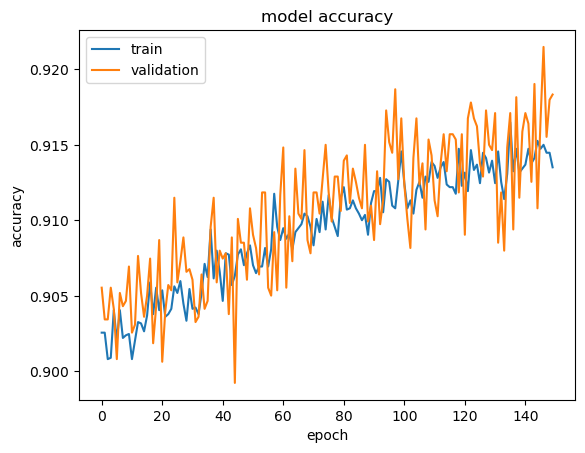

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

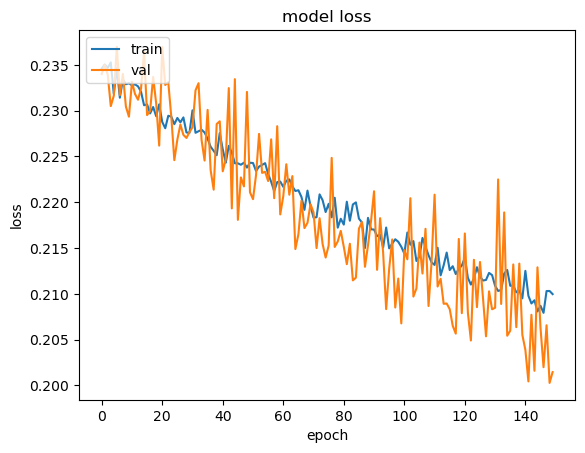

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [48]:
y_hat = model.predict(X_test)
y_hat = [0 if y < 0.5 else 1 for y in y_hat]

179/179 [==============================] - 0s 384us/step


In [53]:
print(f"The final accuracy score is {accuracy_score(y_test, y_hat) * 100}.")

The final accuracy score is 92.1310900806169.
